# RNN and LSTM Plots
This notebook will load in the different test set evaluation metrics and plot the results for different regularization parameters. Specific classes are set to plot the data and the overall test loss for the different setting of the regularization parameters.

In [1]:
import matplotlib.pyplot as plt
import pickle

## Initialization

In [10]:
def make_plot(d, x_axis_values, x_axis_title, class_indices, class_names, plot_title, file_name):
    fig, ax = plt.subplots()
    plt.plot(x_axis_values, d['total'][0], label='Base Model', marker='o')
    plt.plot(x_axis_values, d[class_indices[0]][0], label=class_names[class_indices[0]], marker='o')
    plt.plot(x_axis_values, d[class_indices[1]][0], label=class_names[class_indices[1]], marker='o')
    ax.set_xlim(0)
    if x_axis_title == 'L1 Weight Decay' or x_axis_title == 'L2 Weight Decay':
        plt.xticks(x_axis_values, ['', '0.001', '0.01', '0.1'])
    else:
        plt.xticks(x_axis_values, ['', '0.1', '0.2', '0.3'])
    plt.xlabel(x_axis_title)
    plt.ylabel('Loss')
    plt.title(plot_title)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'./Figures/{file_name}')
    plt.show()

In [3]:
patent_classification_classes = ['Chemistry; Metallurgy', 'Electricity', 'Fixed Constructions', 'General tagging of new or cross-sectional technology', 'Human Necessities', 'Mechanical Engineering; Lightning; Heating; Weapons; Blasting', 'Performing Operations; Transporting', 'Physics', 'Textiles; Paper']

In [4]:
bankings_77_classes = [
    'Refund_not_showing_up', 
    'activate_my_card', 
    'age_limit',
    'apple_pay_or_google_pay', 
    'atm_support', 
    'automatic_top_up',
    'balance_not_updated_after_bank_transfer',
    'balance_not_updated_after_cheque_or_cash_deposit',
    'beneficiary_not_allowed', 
    'cancel_transfer', 
    'card_about_to_expire',
    'card_acceptance', 
    'card_arrival', 
    'card_delivery_estimate', 
    'card_linking',
    'card_not_working', 
    'card_payment_fee_charged',
    'card_payment_not_recognised', 
    'card_payment_wrong_exchange_rate',
    'card_swallowed', 
    'cash_withdrawal_charge',
    'cash_withdrawal_not_recognised', 
    'change_pin', 
    'compromised_card',
    'contactless_not_working', 
    'country_support', 
    'declined_card_payment',
    'declined_cash_withdrawal', 
    'declined_transfer',
    'direct_debit_payment_not_recognised', 
    'disposable_card_limits',
    'edit_personal_details', 
    'exchange_charge', 
    'exchange_rate',
    'exchange_via_app', 
    'extra_charge_on_statement', 
    'failed_transfer',
    'fiat_currency_support', 
    'get_disposable_virtual_card', 
    'get_physical_card',
    'getting_spare_card', 
    'getting_virtual_card', 
    'lost_or_stolen_card',
    'lost_or_stolen_phone', 
    'order_physical_card', 
    'passcode_forgotten',
    'pending_card_payment', 
    'pending_cash_withdrawal', 
    'pending_top_up',
    'pending_transfer', 
    'pin_blocked', 
    'receiving_money', 
    'request_refund',
    'reverted_card_payment?', 
    'supported_cards_and_currencies',
    'terminate_account', 
    'top_up_by_bank_transfer_charge',
    'top_up_by_card_charge', 
    'top_up_by_cash_or_cheque', 
    'top_up_failed',
    'top_up_limits', 
    'top_up_reverted', 
    'topping_up_by_card',
    'transaction_charged_twice', 
    'transfer_fee_charged',
    'transfer_into_account', 
    'transfer_not_received_by_recipient',
    'transfer_timing', 
    'unable_to_verify_identity', 
    'verify_my_identity',
    'verify_source_of_funds', 
    'verify_top_up', 
    'virtual_card_not_working',
    'visa_or_mastercard', 
    'why_verify_identity', 
    'wrong_amount_of_cash_received', 
    'wrong_exchange_rate_for_cash_withdrawal'
]

In [5]:
weight_decays_l1 = [0, 0.001, 0.01, 0.1]
weight_decays_l2 = [0, 0.001, 0.01, 0.1]
dropout_rates = [0, 0.1, 0.2, 0.3]
dropconnect_rates = [0, 0.1, 0.2, 0.3]

## Patent Classification Dataset Plots

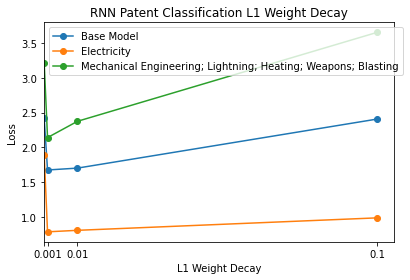

In [11]:
# Classes follow same trend no specific biases
with open('./Results/rnn_l1_weight_decay_patent_classification.pickle', 'rb') as f:
    rnn_l1_patent = pickle.load(f)
make_plot(rnn_l1_patent, weight_decays_l1, 'L1 Weight Decay', [1, 5], patent_classification_classes, 'RNN Patent Classification L1 Weight Decay', 'rnn_patent_l1')

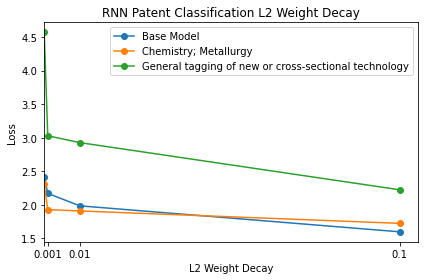

In [12]:
# Classes follow same trend no specific biases
with open('./Results/rnn_l2_weight_decay_patent_classification.pickle', 'rb') as f:
    rnn_l2_patent = pickle.load(f)
make_plot(rnn_l2_patent, weight_decays_l2, 'L2 Weight Decay', [0, 3], patent_classification_classes, 'RNN Patent Classification L2 Weight Decay', 'rnn_patent_l2')

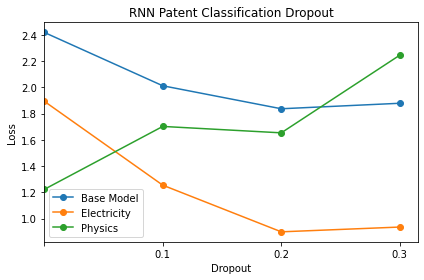

In [13]:
# Overall loss goes down
# Does display some levels of class bias with one class following same trend and other class loss going up
# Class 1 down
# Class 7 up
with open('./Results/rnn_dropout_patent_classification.pickle', 'rb') as f:
    rnn_dropout_patent = pickle.load(f)
make_plot(rnn_dropout_patent, dropout_rates, 'Dropout', [1, 7], patent_classification_classes, 'RNN Patent Classification Dropout', 'rnn_patent_dropout')

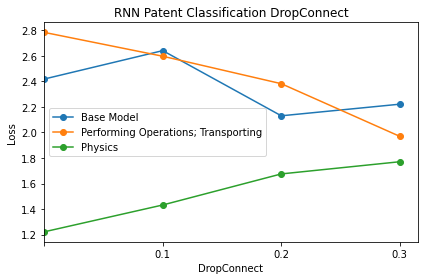

In [14]:
# Does display some levels of class bias with one class going up and one class going down while overall loss follows different trend
# Class 7 loss goes up
# Class 6 loss goes down
with open('./Results/rnn_dropconnect_patent_classification.pickle', 'rb') as f:
    rnn_dropconnect_patent = pickle.load(f)
make_plot(rnn_dropconnect_patent, dropconnect_rates, 'DropConnect', [6, 7], patent_classification_classes, 'RNN Patent Classification DropConnect', 'rnn_patent_dropconnect')

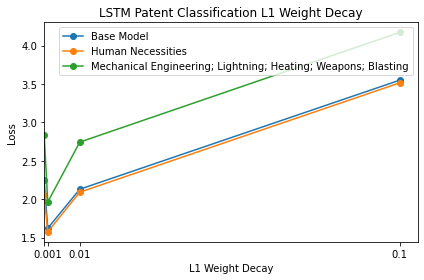

In [25]:
# Classes follow overall same trend no specific biases towards increasing and decreasing
# Class 4 same trend
# Class 5 same trend
with open('./Results/lstm_l1_weight_decay_patent_classification.pickle', 'rb') as f:
    lstm_l1_patent = pickle.load(f)
make_plot(lstm_l1_patent, weight_decays_l1, 'L1 Weight Decay', [4, 5], patent_classification_classes, 'LSTM Patent Classification L1 Weight Decay', 'lstm_patent_l1')

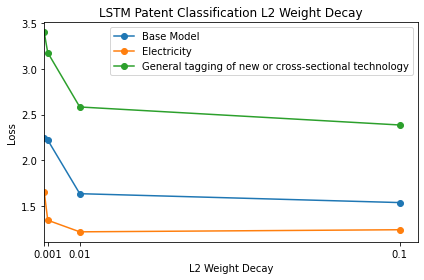

In [26]:
# Overall down classes follow same trend no specific biases
# Class 1 down
# Class 3 down
with open('./Results/lstm_l2_weight_decay_patent_classification.pickle', 'rb') as f:
    lstm_l2_patent = pickle.load(f)
make_plot(lstm_l2_patent, weight_decays_l2, 'L2 Weight Decay', [1, 3], patent_classification_classes, 'LSTM Patent Classification L2 Weight Decay', 'lstm_patent_l2')

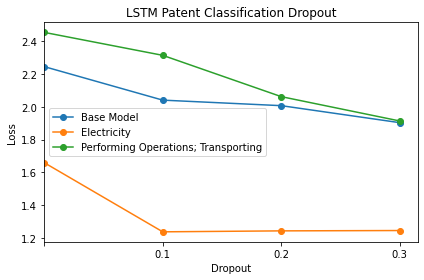

In [15]:
# Overall down classes follow same trend no specific biases
# Class 1 down
# Class 6 down
with open('./Results/lstm_dropout_patent_classification.pickle', 'rb') as f:
    lstm_dropout_patent = pickle.load(f)
make_plot(lstm_dropout_patent, dropout_rates, 'Dropout', [1, 6], patent_classification_classes, 'LSTM Patent Classification Dropout', 'lstm_patent_dropout')

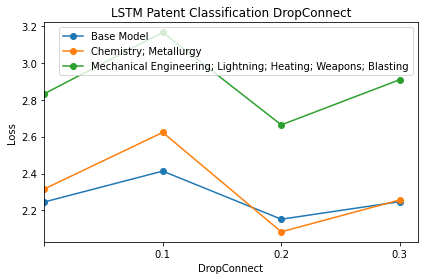

In [16]:
# Classes follow overall same trend no specific biases towards increasing and decreasing
# Class 0 same trend
# Class 5 same trend
with open('./Results/lstm_dropconnect_patent_classification.pickle', 'rb') as f:
    lstm_dropconnect_patent = pickle.load(f)
make_plot(lstm_dropconnect_patent, dropconnect_rates, 'DropConnect', [0, 5], patent_classification_classes, 'LSTM Patent Classification DropConnect', 'lstm_patent_dropconnect')

## Bankings77 Dataset Plot

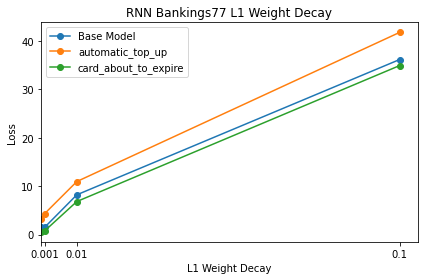

In [18]:
# Only up
# Class 5 up a lot
# Class 10 up less
with open('./Results/rnn_l1_weight_decay_bankings_77.pickle', 'rb') as f:
    rnn_l1_bankings = pickle.load(f)
make_plot(rnn_l1_bankings, weight_decays_l1, 'L1 Weight Decay', [5, 10], bankings_77_classes, 'RNN Bankings77 L1 Weight Decay', 'rnn_bankings_l1')

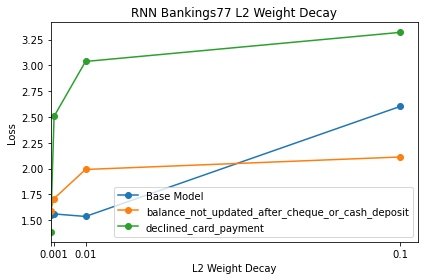

In [19]:
# Only up
# Class 7 up less
# Class 26 up a lot
with open('./Results/rnn_l2_weight_decay_bankings_77.pickle', 'rb') as f:
    rnn_l2_bankings = pickle.load(f)
make_plot(rnn_l2_bankings, weight_decays_l2, 'L2 Weight Decay', [7, 26], bankings_77_classes, 'RNN Bankings77 L2 Weight Decay', 'rnn_bankings_l2')

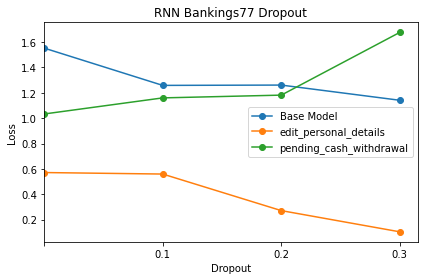

In [17]:
# Class 47 up
# Class 31 Down
with open('./Results/rnn_dropout_bankings_77.pickle', 'rb') as f:
    rnn_dropout_bankings = pickle.load(f)
make_plot(rnn_dropout_bankings, dropout_rates, 'Dropout', [31, 47], bankings_77_classes, 'RNN Bankings77 Dropout', 'rnn_bankings_dropout')

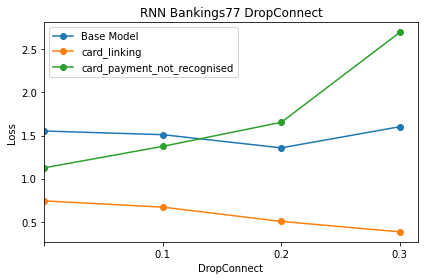

In [18]:
# Class 14 down
# Class 17 up
with open('./Results/rnn_dropconnect_bankings_77.pickle', 'rb') as f:
    rnn_dropconnect_bankings = pickle.load(f)
make_plot(rnn_dropconnect_bankings, dropconnect_rates, 'DropConnect', [14, 17], bankings_77_classes, 'RNN Bankings77 DropConnect', 'rnn_bankings_dropconnect')

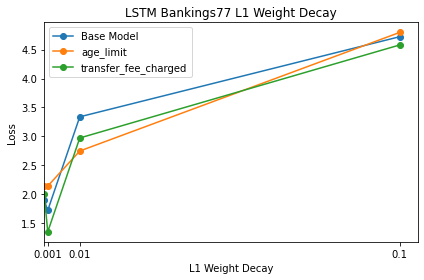

In [17]:
# No Class Bias follow same trend
# Class 2 up
# Class 3 up
# Class 64 down
with open('./Results/lstm_l1_weight_decay_bankings_77.pickle', 'rb') as f:
    lstm_l1_bankings = pickle.load(f)
make_plot(lstm_l1_bankings, weight_decays_l1, 'L1 Weight Decay', [2, 64], bankings_77_classes, 'LSTM Bankings77 L1 Weight Decay', 'lstm_bankings_l1')

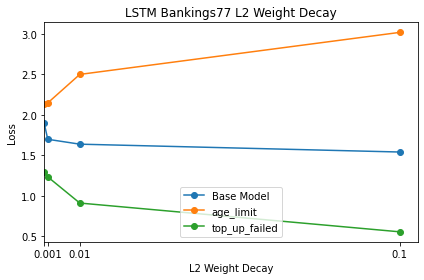

In [16]:
# Class 2
# Class 59
with open('./Results/lstm_l2_weight_decay_bankings_77.pickle', 'rb') as f:
    lstm_l2_bankings = pickle.load(f)
make_plot(lstm_l2_bankings, weight_decays_l2, 'L2 Weight Decay', [2, 59], bankings_77_classes, 'LSTM Bankings77 L2 Weight Decay', 'lstm_bankings_l2')

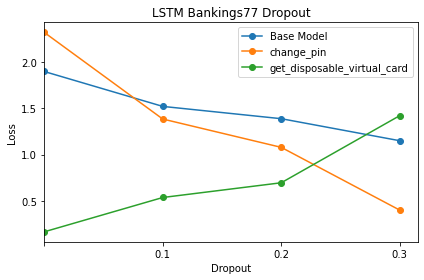

In [19]:
with open('./Results/lstm_dropout_bankings_77.pickle', 'rb') as f:
    lstm_dropout_bankings = pickle.load(f)
make_plot(lstm_dropout_bankings, dropout_rates, 'Dropout', [22, 38], bankings_77_classes, 'LSTM Bankings77 Dropout', 'lstm_bankings_dropout')

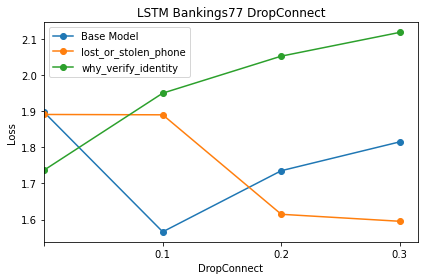

In [20]:
with open('./Results/lstm_dropconnect_bankings_77.pickle', 'rb') as f:
    lstm_dropconnect_bankings = pickle.load(f)
make_plot(lstm_dropconnect_bankings, dropconnect_rates, 'DropConnect', [43, 74], bankings_77_classes, 'LSTM Bankings77 DropConnect', 'lstm_bankings_dropconnect')